In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Creating a train and test dataset

In [4]:
X = df.drop(labels="math_score",axis=1)

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
Y = df["math_score"]

In [7]:
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

Converting all the categorical values into numerical values.

In [8]:
df_cat = df.select_dtypes(include=object)
df_num = X.select_dtypes(include=np.number)

In [9]:
df_cat.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [10]:
df_num.head()

,reading_score,writing_score
0,72,74
1,90,88
2,95,93
3,57,44
4,78,75


In [11]:
df_cat['gender'] = pd.get_dummies(df_cat['gender'],drop_first=True)

In [12]:
df_cat['gender']

0      False
1      False
2      False
3       True
4       True
       ...  
995    False
996     True
997    False
998    False
999    False
Name: gender, Length: 1000, dtype: bool

In [13]:
df_cat = df.select_dtypes(include = object)

In [14]:
cols = list(df_cat.columns)
df_cat = pd.concat([df_cat.drop(cols,inplace=False,axis=1),pd.get_dummies(df_cat,columns=cols)],axis = 1)

In [15]:
df_cat.head()

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True


In [16]:
pd.get_dummies
pd.concat?

Now transforming the numerical dataset into normalized

In [17]:
cols = list(df_num.columns)
for col in cols:
    df_num[col]=(df_num[col]-np.mean(df_num[col]))/np.std(df_num[col])
df_num.head()

,reading_score,writing_score
0,0.193999,0.391492
1,1.427476,1.313269
2,1.770109,1.642475
3,-0.833899,-1.583744
4,0.605158,0.457333


Using the above transformation using Sklearn library

In [18]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
import sklearn

In [20]:
dir(sklearn.compose)

['ColumnTransformer',
 'TransformedTargetRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_column_transformer',
 '_target',
 'make_column_selector',
 'make_column_transformer']

In [21]:
col_num = X.select_dtypes(include = np.number).columns
col_cat = X.select_dtypes(include = object).columns

oh_transformer = OneHotEncoder()
sc_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,col_cat),
        ("StandardScaler",sc_transformer,col_num)
    ]
)


In [22]:
X = preprocessor.fit_transform(X)

In [23]:
X.shape

(1000, 19)

In [24]:
#Splitting into train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
X_train.shape,y_train.shape

((800, 19), (800,))

In [29]:
!python3 -m venv myenv

In [30]:
!source myenv/bin/activate

In [32]:
!pip3 install catboost

In [34]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [54]:
models = {
    'KNeighborsRegressor':KNeighborsRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'xgboost':XGBRegressor(),
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor()
}

In [55]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true,predicted)
    r2 = r2_score(true,predicted)
    return mse,rmse,mae,r2

In [56]:
model_his = []
r2_his = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    #calculate the predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    model_his.append(list(models.keys())[i])
    mse,rmse,mae,r2 = evaluate_model(y_train,y_pred_train)
    
    print(list(models.keys())[i])
    print("Performance on the train dataset: ")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R2 : {r2:.4f}")
    
    print('-'*15)
    
    mset,rmset,maet,r2t = evaluate_model(y_test,y_pred_test)
    print("Performance on the test dataset: ")
    #print(f"Score : {model.score(y_test,y_pred_test)}")
    print(f"MSE : {mset:.2f}")
    print(f"RMSE : {rmset:.4f}")
    print(f"MAE : {maet:.4f}")
    print(f"R2 : {r2t:.4f}")
    print('='*15)
    
    r2_his.append(r2t)
    

KNeighborsRegressor
Performance on the train dataset: 
MSE : 32.58
RMSE : 5.7079
MAE : 4.5168
R2 : 0.8555
---------------
Performance on the test dataset: 
MSE : 52.61
RMSE : 7.2530
MAE : 5.6210
R2 : 0.7838
DecisionTreeRegressor
Performance on the train dataset: 
MSE : 0.08
RMSE : 0.2795
MAE : 0.0187
R2 : 0.9997
---------------
Performance on the test dataset: 
MSE : 66.75
RMSE : 8.1704
MAE : 6.4950
R2 : 0.7257
xgboost
Performance on the train dataset: 
MSE : 1.01
RMSE : 1.0073
MAE : 0.6875
R2 : 0.9955
---------------
Performance on the test dataset: 
MSE : 41.90
RMSE : 6.4733
MAE : 5.0577
R2 : 0.8278
SVR
Performance on the train dataset: 
MSE : 43.26
RMSE : 6.5770
MAE : 4.8692
R2 : 0.8081
---------------
Performance on the test dataset: 
MSE : 66.04
RMSE : 8.1266
MAE : 5.4015
R2 : 0.7286
XGBRegressor
Performance on the train dataset: 
MSE : 1.01
RMSE : 1.0073
MAE : 0.6875
R2 : 0.9955
---------------
Performance on the test dataset: 
MSE : 41.90
RMSE : 6.4733
MAE : 5.0577
R2 : 0.8278
L

In [59]:
pd.DataFrame(list(zip(model_his,r2_his)),columns=["Model","r2"]).sort_values(by="r2",ascending=False)

,Model,r2
6,Ridge,0.880593
5,LinearRegression,0.879222
8,RandomForestRegressor,0.850285
9,AdaBoostRegressor,0.844672
2,xgboost,0.827797
4,XGBRegressor,0.827797
7,Lasso,0.825320
0,KNeighborsRegressor,0.783813
3,SVR,0.728600
1,DecisionTreeRegressor,0.725670


As aspected the linear models are performing better

### Linear model

In [71]:
for a in np.arange(0.5,1.05,0.05):
    linear_model = Ridge(alpha = a)
    print(f"Score : {linear_model.fit(X_train,y_train).score(X_test,y_test):.4f} for alpha : {a:.4f}")

Score : 0.8805 for alpha : 0.5000
Score : 0.8805 for alpha : 0.5500
Score : 0.8805 for alpha : 0.6000
Score : 0.8805 for alpha : 0.6500
Score : 0.8805 for alpha : 0.7000
Score : 0.8806 for alpha : 0.7500
Score : 0.8806 for alpha : 0.8000
Score : 0.8806 for alpha : 0.8500
Score : 0.8806 for alpha : 0.9000
Score : 0.8806 for alpha : 0.9500
Score : 0.8806 for alpha : 1.0000


So there is very little change in accuracy when we tweak the values of alpha in ridge so we will go with the default model

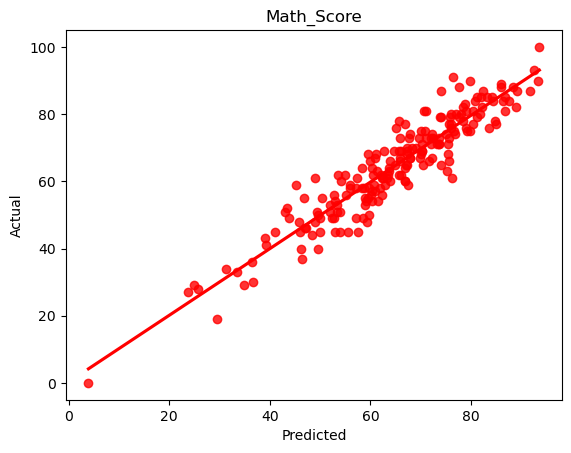

In [81]:
linear_model = Ridge()
linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
sns.regplot(x = y_pred, y = y_test, color = 'red' , ci = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Math_Score")
plt.show()

In [92]:
df_result = pd.DataFrame({"Actual":y_test,"Predicted":y_pred,"Difference":y_test-y_pred})

In [102]:
sum(df_result["Difference"] < 0.9)

119

So Ridge model turns out as our choice to move forward